### Data Description

1.	InvoiceNo:   A unique identifier for each invoice or transaction, often used for
                 tracking and reference purposes.
2.	StockCode:   A code or identifier associated with a specific product or item in the e-
                 commerce store's inventory, used for cataloging and tracking purposes.
3.	Description: A categorical feature that provides a brief textual description of the
                 product or item being sold, offering clarity to customers about what they are
                 purchasing.
4.	Quantity:   The quantity or number of units of a product that were included in the
                transaction, indicating the purchase volume for each item.
5.	InvoiceDate: The date and time when the transaction or invoice was generated,
                  offering insights into when purchases were made and allowing for temporal
                  analysis.
6.	UnitPrice:   Indicating the total cost of the items purchased.
7.	CustomerID:  A unique identifier associated with each customer or shopper,
                 allowing for customer-specific analysis and tracking of individual purchasing
                 behavior.
8.	Country: The name of the country where the customer is located or where the
                  transaction occurred.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt
from operator import attrgetter
from matplotlib.ticker import FuncFormatter
from lifetimes import BetaGeoFitter
from lifetimes.utils import summary_data_from_transaction_data



In [2]:
data = pd.read_csv("e_commerce.csv")
print('E-Shop Pro Dataset:')
data.head()

E-Shop Pro Dataset:


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,01/12/2010 08:26,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,01/12/2010 08:26,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,01/12/2010 08:26,17850.0,SC3463,Books,78,61.49,Mali
3,536365,01/12/2010 08:26,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,01/12/2010 08:26,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], dayfirst=True)

In [5]:
data["InvoiceDate"].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [8]:
# check for the total number of null values

data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [9]:
# delete rows with null values

data.dropna(inplace=True)

In [10]:
# recheck the total number of null values

data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [11]:
duplicates = data[data.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [InvoiceNo, InvoiceDate, CustomerID, StockCode, Description, Quantity, UnitPrice, Country]
Index: []


In [12]:
# convert CustomerID data type(float) to integer

data['CustomerID'] = data['CustomerID'].astype(int)


# Exploratory Data Analysis 

In [13]:
# Total quantity sold (summing across all products)
total_quantity = data['Quantity'].sum()

# Total price (summing UnitPrice * Quantity)
total_price = (data['UnitPrice'] * data['Quantity']).sum()

# Create a new one-row DataFrame to show totals
total_sold = pd.DataFrame({
    'Total_Quantity': [total_quantity],
    'Total_Price': [total_price]
})

total_sold


,Total_Quantity,Total_Price
0,20536106,1.037436e+09


In [14]:
# Group by product description and sum the quantity sold
total_quantity_by_description = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Convert to DataFrame for better formatting if needed
totals = total_quantity_by_description.reset_index()
totals.columns = ['Description', 'Total_Quantity']

totals


,Description,Total_Quantity
0,Shoes,2069190
1,Jewelry,2065153
2,Toys,2063396
3,Furniture,2063221
4,Sports Equipment,2060571
5,Cloths,2054709
6,Cosmetics,2051088
7,Kitchenware,2046704
8,Electronics,2036733
9,Books,2025341


In [15]:
print('Country count:')

dc = data['Country'].value_counts().reset_index()
dc.head(5)

Country count:


,index,Country
0,Nigeria,14714
1,Sierra Leone,14684
2,Somalia,14656
3,Cote d'Ivoire,14645
4,Mozambique,14639


In [16]:
quantity_per_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values("Quantity", ascending = False).reset_index()

In [17]:
print("Quantity of goods sold in a country:")
quantity_per_country.head(5)

Quantity of goods sold in a country:


,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


<Figure size 1400x700 with 0 Axes>

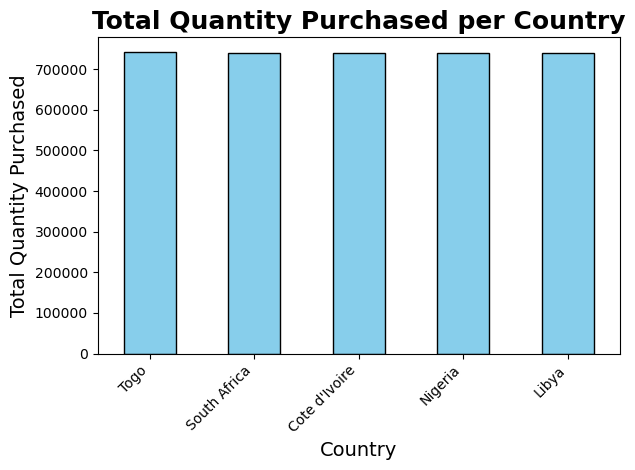

In [89]:
# Sort and plot total quantity per country from a DataFrame
plt.figure(figsize=(14, 7))
quantity_per_country.sort_values(by='Quantity', ascending=False).head(5).plot(
    x='Country', y='Quantity', kind='bar', color='skyblue', edgecolor='black', legend=False
)

plt.title('Total Quantity Purchased per Country', fontsize=18, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Purchased', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
print("Quantity of goods sold in a country:")
quantity_per_country.tail(5)

Quantity of goods sold in a country:


,index,Country,Quantity
23,10,Madagascar,726297
24,14,Niger,725841
25,22,Tanzania,725664
26,26,Zambia,725152
27,25,Uganda,724525


In [19]:
data["InvoiceDate"].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [20]:
# Draw a plot of top 10 countries with highest number of quantity purchase
top_countries = quantity_per_country.head(10)

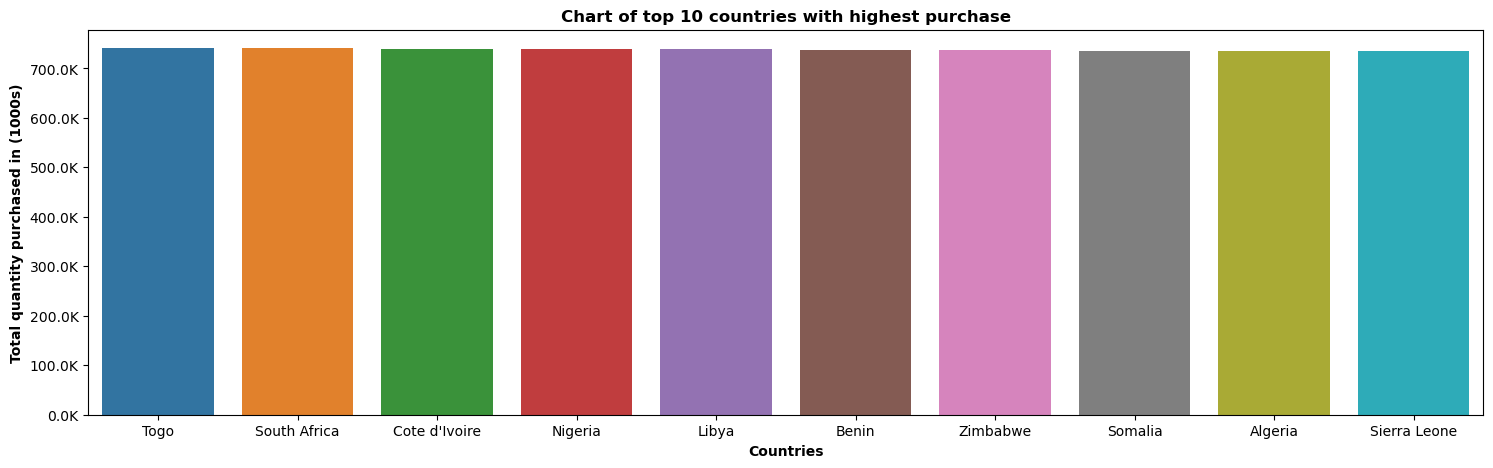

In [21]:

# Create a bar chart from the selected data
plt.figure(figsize=(18, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= top_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Total quantity purchased in (1000s)', fontweight='bold')
plt.title('Chart of top 10 countries with highest purchase', fontweight='bold')
plt.show()

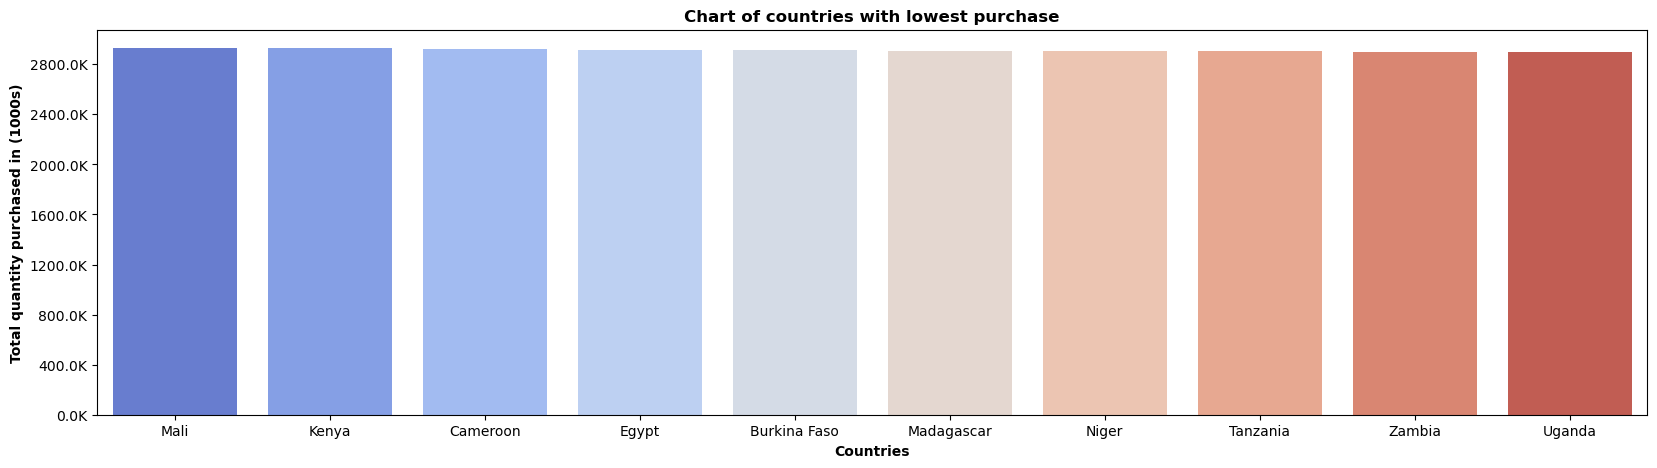

In [71]:
# Draw a plot of 10 countries with least number of quantity purchase
least_10_countries = quantity_per_country.tail(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= least_10_countries, palette="coolwarm")
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Total quantity purchased in (1000s)', fontweight='bold')
plt.title('Chart of countries with lowest purchase', fontweight='bold')
plt.show()

In [23]:
# Number of customers per Country

country_to_customers = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [24]:
country_to_customers.head(3)

,index,Country,Number of customers
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


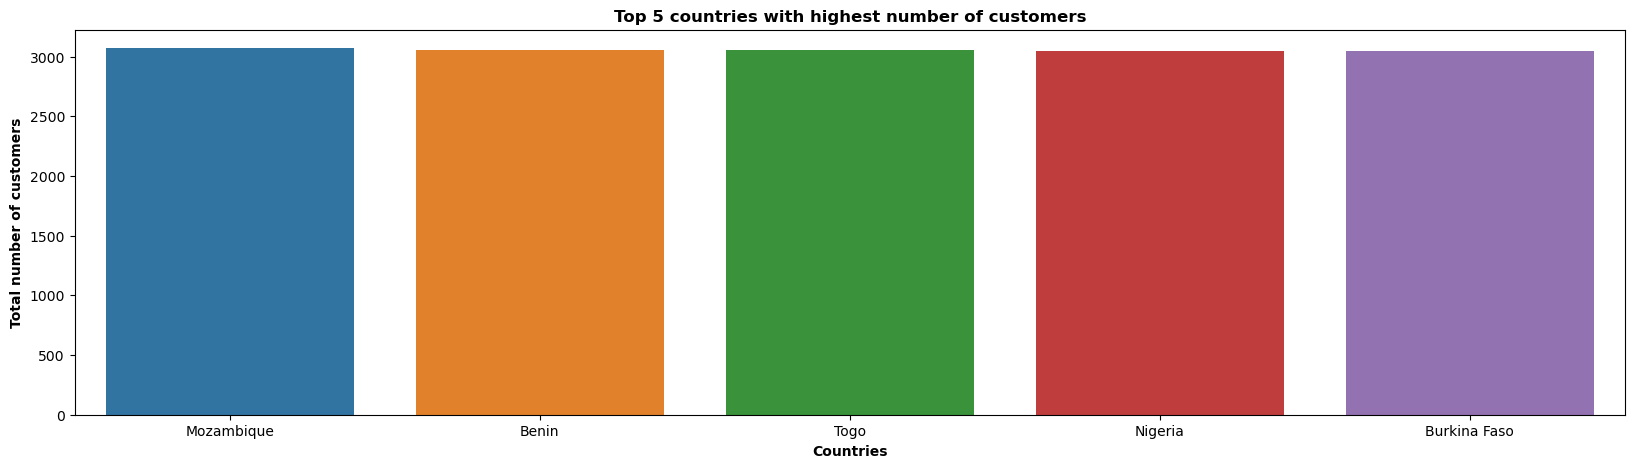

In [25]:
# Draw a plot of top 10 countries with highest number of customers (unique customerID)
top_countries_to_customers = country_to_customers.head(5)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Total number of customers', fontweight='bold')
plt.title('Top 5 countries with highest number of customers', fontweight='bold')
plt.show()

In [26]:
print('Customer ID count:')

data['CustomerID'].value_counts()

Customer ID count:


17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: CustomerID, Length: 4372, dtype: int64

In [27]:
print("Country VS. Customer ID  count:") 

data[['Country','CustomerID']].value_counts()

Country VS. Customer ID  count:


Country       CustomerID
Libya         17841         324
Senegal       17841         311
Burkina Faso  17841         308
Mozambique    17841         303
Uganda        17841         301
                           ... 
Ghana         14022           1
              14024           1
              14037           1
Somalia       14077           1
South Africa  14576           1
Length: 84912, dtype: int64

In [28]:
print("Customer ID VS. Invoice Number count:")

data[['CustomerID','InvoiceNo']].value_counts()

Customer ID VS. Invoice Number count:


CustomerID  InvoiceNo
14096       576339       542
            579196       533
            580727       529
            578270       442
            573576       435
                        ... 
14744       C544590        1
17423       C553486        1
            C572747        1
17425       577553         1
12346       541431         1
Length: 22190, dtype: int64

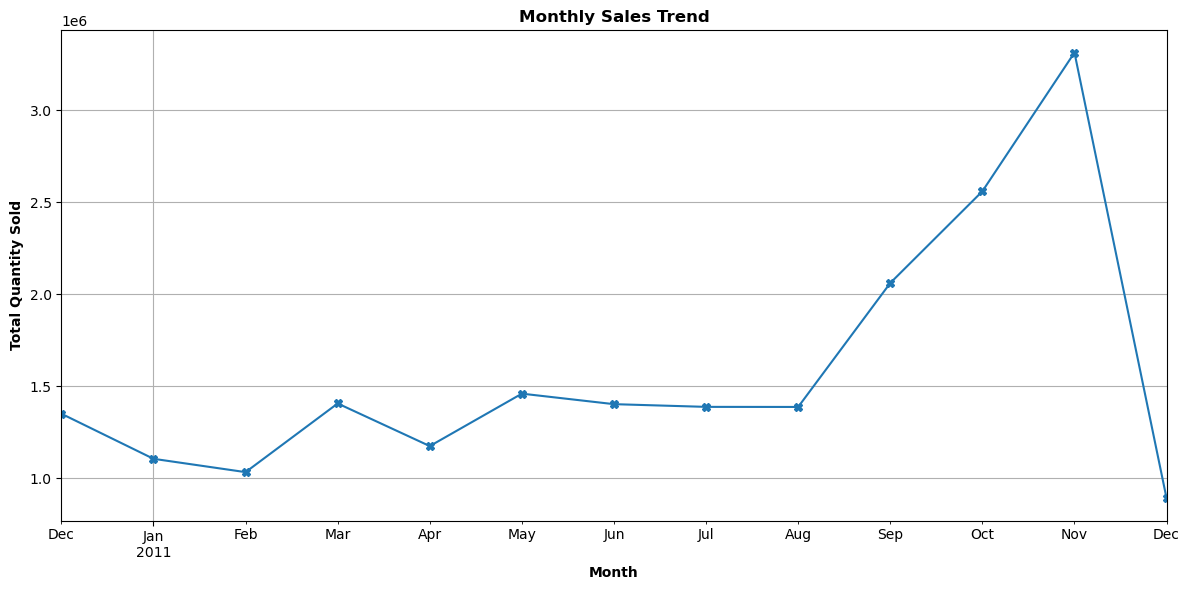

In [29]:


# Calculate monthly sales
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Plot sales trends
monthly_sales.plot(kind='line', figsize=(12, 6), marker='X')
plt.title('Monthly Sales Trend', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Total Quantity Sold', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()





In [30]:
product_sales = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(product_sales)


Description
Shoes               2069190
Jewelry             2065153
Toys                2063396
Furniture           2063221
Sports Equipment    2060571
Cloths              2054709
Cosmetics           2051088
Kitchenware         2046704
Electronics         2036733
Books               2025341
Name: Quantity, dtype: int64


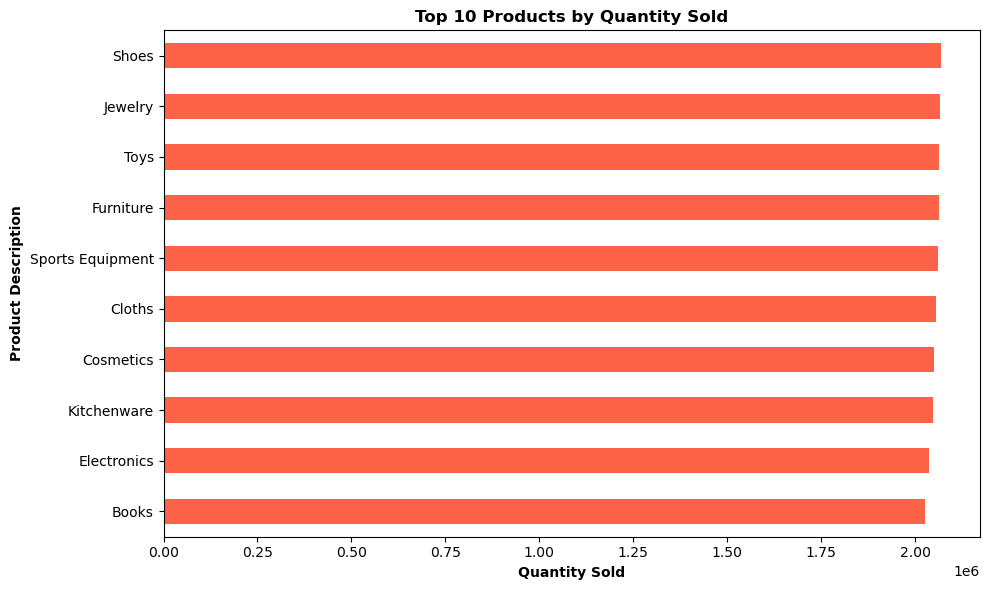

In [31]:
# Plot top 10 selling products
top_products = product_sales.head(10)

top_products.plot(kind='barh', figsize=(10, 6), color='tomato')
plt.title('Top 10 Products by Quantity Sold', fontweight='bold')
plt.xlabel('Quantity Sold', fontweight='bold')
plt.ylabel('Product Description', fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


# Cohort Analysis

In [32]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda


In [33]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

data["InvoiceDate"]  = data["InvoiceDate"].apply(get_month)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850,SC2149,Toys,50,38.83,Rwanda


In [34]:
def get_cohort_date(data):
    """ this function takes in the dataframe
        and returns the cohort date

        variables:
        data = dataframe
        cohort date = the first date they made a purchase
        """

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

#apply the function created to our dataframe and extract the 2 newly created column

data["cohort date"] = get_cohort_date(data)

In [35]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


In [36]:
def get_year_and_month(data, col):
    """
    This function takes in the dataframe and column,
    and returns the month and year component for that column

    Variables:
    data = dataframe
    col = column
    month = month component
    year = year component"""

    month = data[col].dt.month
    year = data[col].dt.year
    return month, year
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(data,"cohort date")

In [37]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int64

In [38]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int64

In [39]:
# apply the fucntion on cohort latest date column
latest_month, latest_year = get_year_and_month(data,"InvoiceDate")

In [40]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int64

In [41]:
# write a function to create cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    """
    This code creates takes in the first and latest month and year
    and returns the calculated period(in months) the customer has been active

    variables:
    first_month: first month the customer made purchase
    first_year: first year the customer made purchase

    latest_month: recent month the customer made purchase
    latest_year: recent year the customer made purchase

    index: The duration between first and latest purchase (in months)"""

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [42]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [43]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


In [44]:
cohort_info = data.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()

# Rename the column name
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [45]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


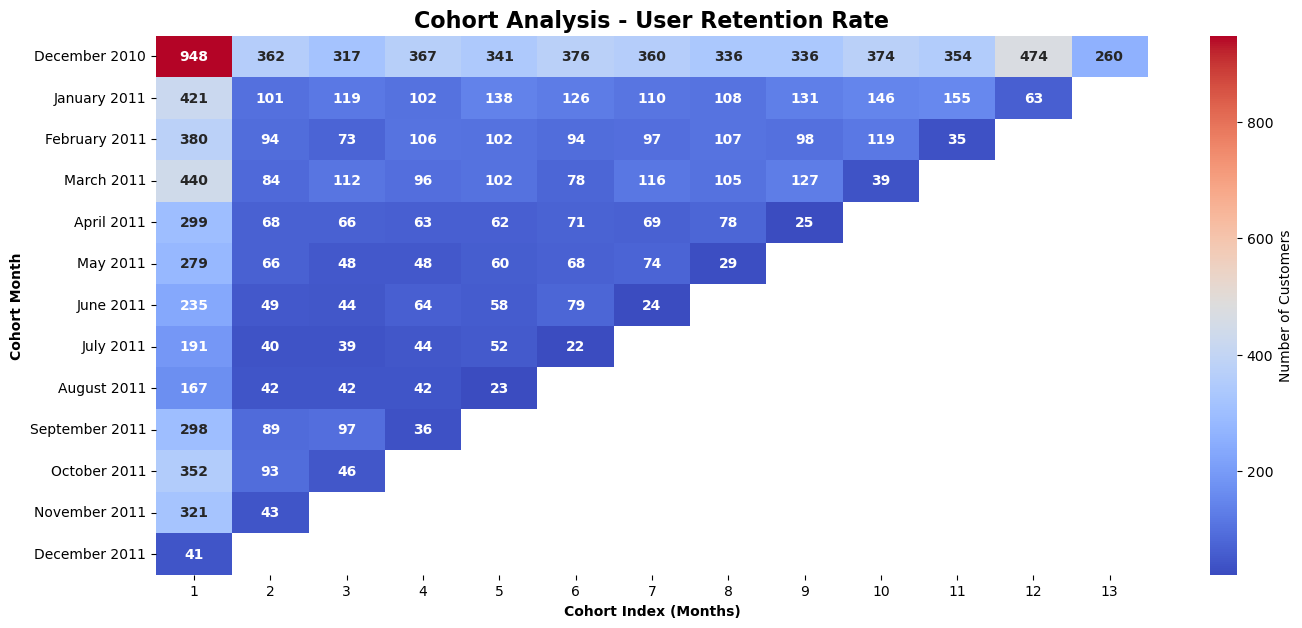

In [46]:
plt.figure(figsize=(16, 7))
sns.heatmap(cohort_table, 
            annot=True, 
            fmt='g', 
            cmap= 'coolwarm', 
            annot_kws={"fontweight": "bold", "fontsize": 10}, cbar_kws={'label': 'Number of Customers'})

plt.title('Cohort Analysis - User Retention Rate', fontweight='bold', fontsize=16)
plt.xlabel('Cohort Index (Months)', fontweight='bold')
plt.ylabel('Cohort Month', fontweight='bold')
plt.show()


In [47]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


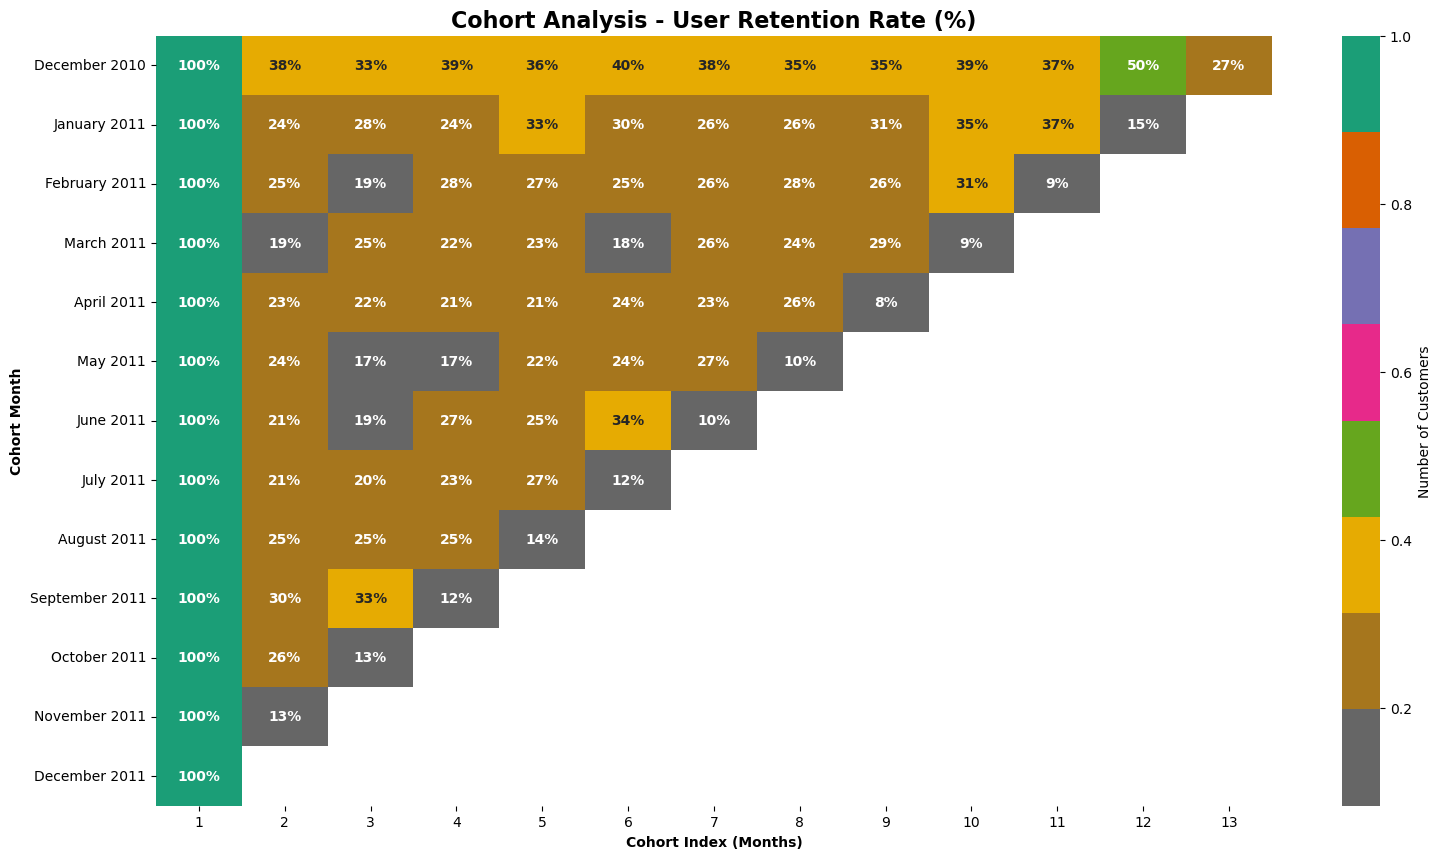

In [48]:
#visualize our results in heatmap

plt.figure(figsize = (18,10))
sns.heatmap(new_cohort_table, 
            annot=True, 
            fmt='.0%', 
            cmap= 'Dark2_r', 
            annot_kws={"fontweight": "bold", "fontsize": 10},cbar_kws={'label': 'Number of Customers'})


plt.title('Cohort Analysis - User Retention Rate (%)', fontweight='bold', fontsize=16)
plt.xlabel('Cohort Index (Months)', fontweight='bold')
plt.ylabel('Cohort Month', fontweight='bold')
plt.show()

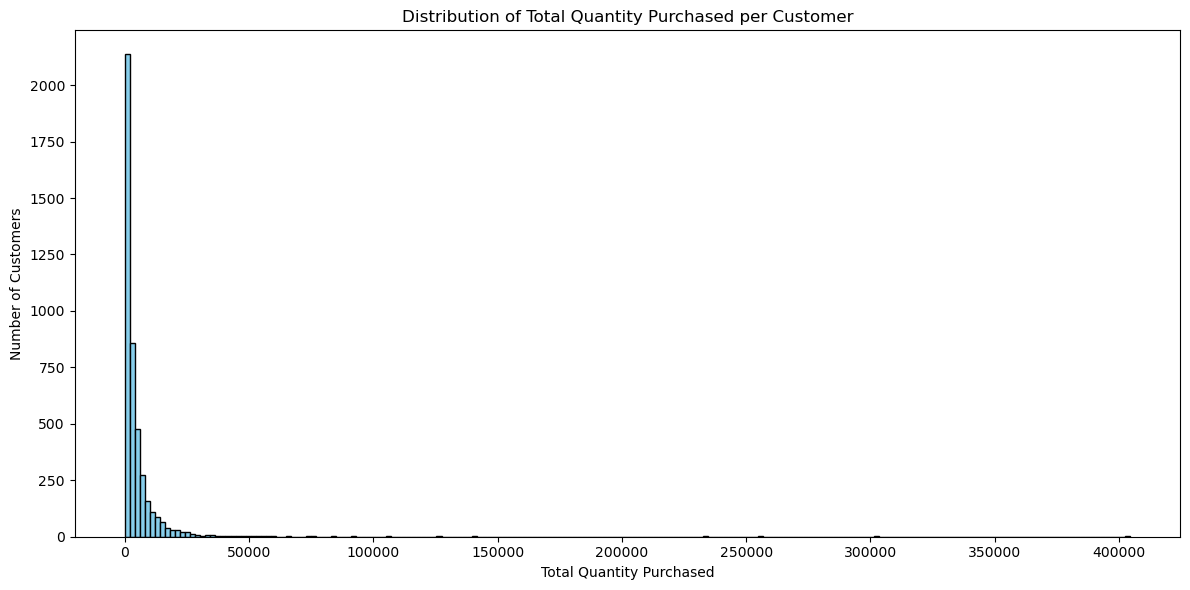

In [83]:
# Total purchases per customer
purchase_distribution = data.groupby('CustomerID')['Quantity'].sum()

# Histogram
plt.figure(figsize=(12, 6))
plt.hist(purchase_distribution, bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Quantity Purchased per Customer')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [49]:

# Set snapshot date as the day after the last transaction
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM + Tenure
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (snapshot_date - x.max()).days,     # Recency
        lambda x: (snapshot_date - x.min()).days,     # Tenure
    ],
    'InvoiceNo': 'nunique',                           # Frequency
    'Quantity': 'sum'                                 # Monetary (proxy)
})

# Rename columns
rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary
0,12346,335,335,2,119
1,12347,1,366,7,8511
2,12348,92,366,4,1539
3,12349,31,31,1,3434
4,12350,304,304,1,917
...,...,...,...,...,...
4367,18280,276,276,1,495
4368,18281,184,184,1,379
4369,18282,1,123,3,786
4370,18283,1,335,16,40533


In [50]:
# Create TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# RFM with Monetary based on actual revenue
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (snapshot_date - x.max()).days,     # Recency
        lambda x: (snapshot_date - x.min()).days,     # Tenure
    ],
    'InvoiceNo': 'nunique',                           # Frequency
    'TotalPrice': 'sum'                               # Monetary (actual)
})

rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']
rfm = rfm.reset_index()


In [51]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary
0,12346,335,335,2,5342.40
1,12347,1,366,7,431501.00
2,12348,92,366,4,82378.47
3,12349,31,31,1,176075.12
4,12350,304,304,1,48173.37
...,...,...,...,...,...
4367,18280,276,276,1,18907.36
4368,18281,184,184,1,26009.01
4369,18282,1,123,3,36010.74
4370,18283,1,335,16,2008747.62


In [52]:
# Recency score (lower is better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency score (higher is better)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Monetary score (higher is better)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine into RFM segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Optionally: Add an RFM score total
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


In [53]:
# how to save RFM to excel file
rfm.to_excel('customer_rfm_scored.xlsx', index=False)


In [54]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index,TotalPrice
0,536365,2010-12-01,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1,664.95
1,536365,2010-12-01,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01,1,1862.95
2,536365,2010-12-01,17850,SC3463,Books,78,61.49,Mali,2010-12-01,1,4796.22
3,536365,2010-12-01,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01,1,370.95
4,536365,2010-12-01,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1,1941.50


In [58]:
# Count unique customers per cohort and period
cohort_data = data.groupby(['cohort date', 'cohort_index'])['CustomerID'].nunique().reset_index()

# Create retention matrix
cohort_counts = cohort_data.pivot(index='cohort date', columns='cohort_index', values='CustomerID')

# Calculate retention rate as a percentage of the first column
# retention = cohort_counts.divide(cohort_counts[0], axis=0)
first_period = cohort_counts.iloc[:, 0]  # Gets the first actual column
retention = cohort_counts.divide(first_period, axis=0)


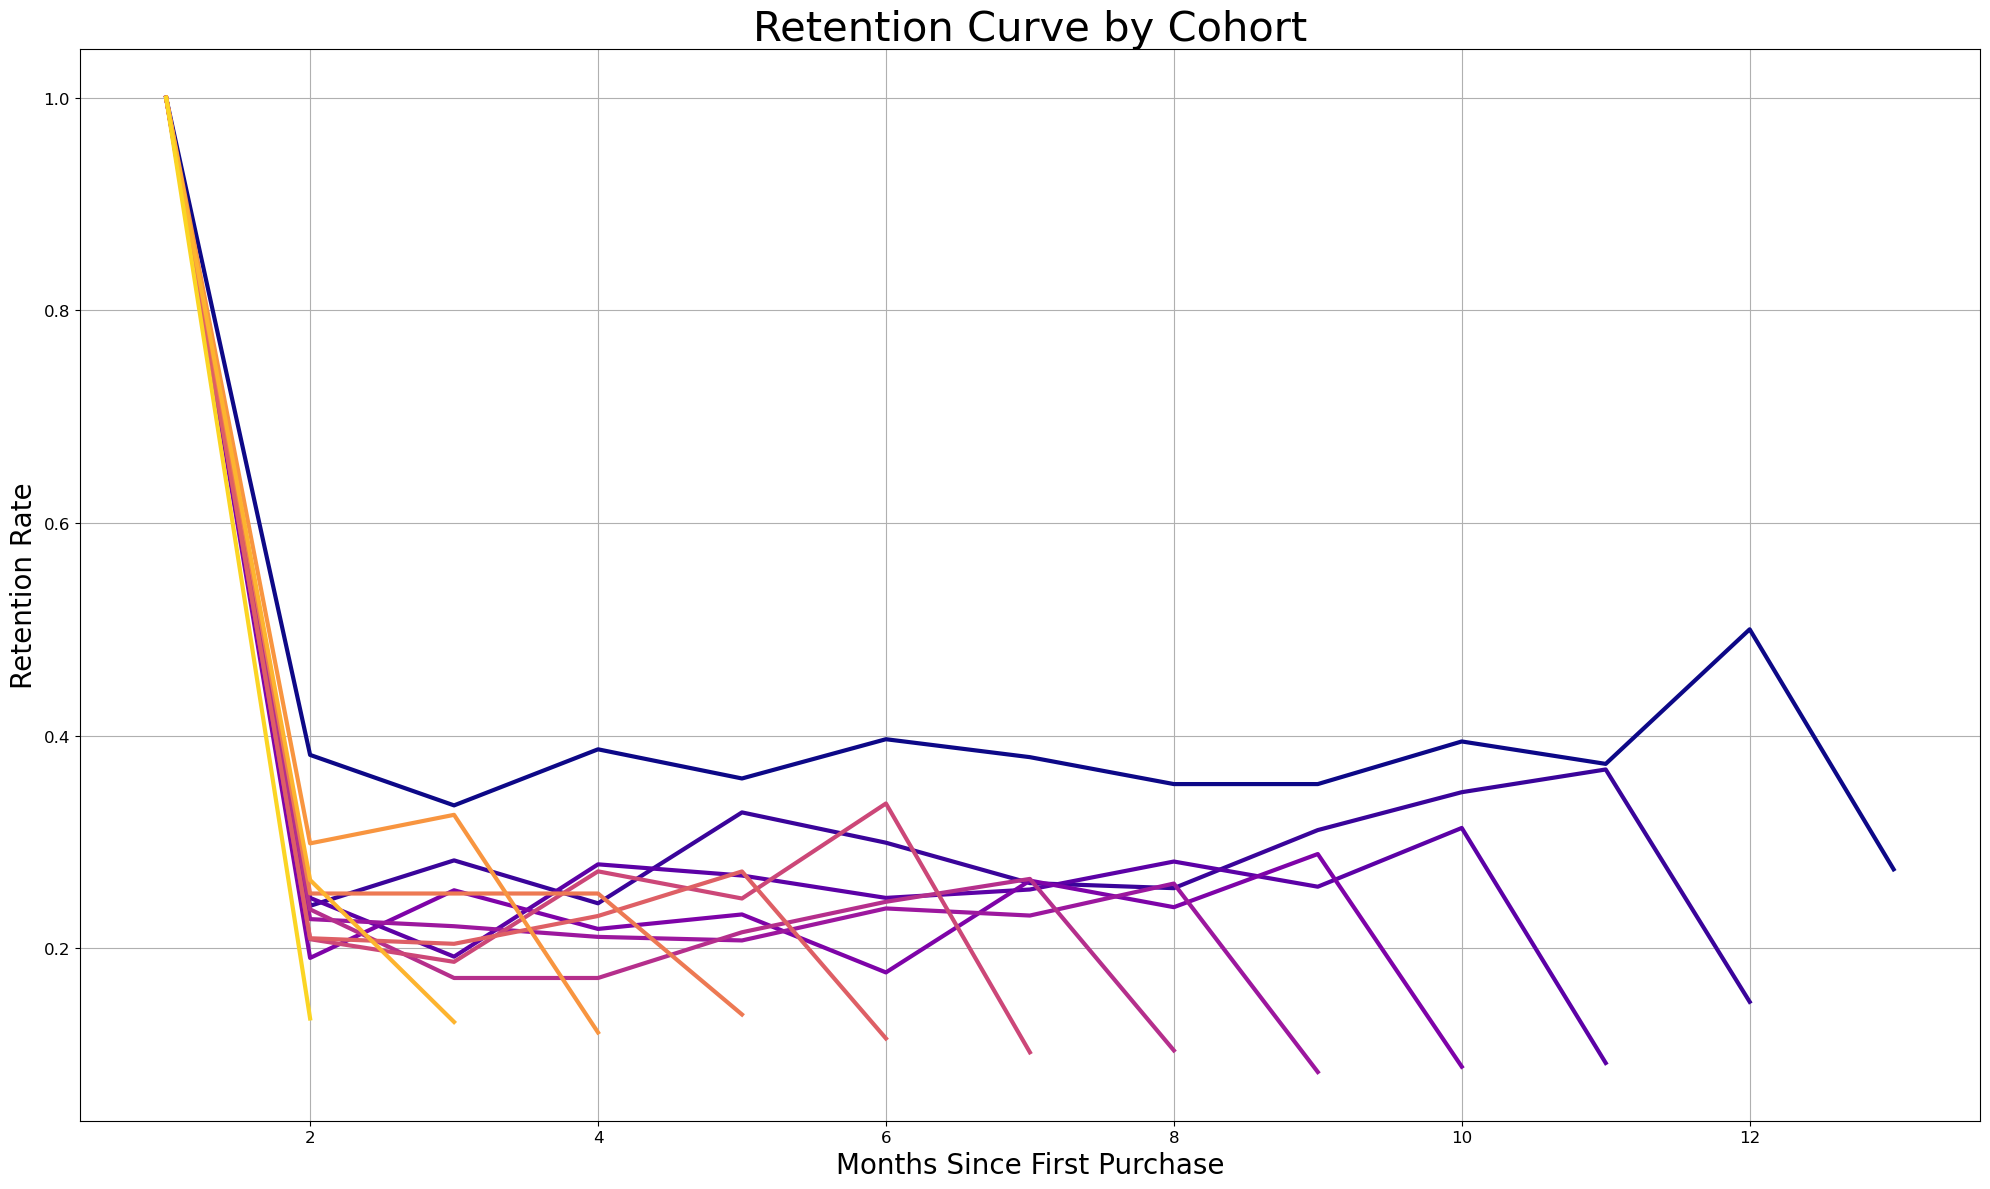

In [59]:
# Set the figure size inside the plot call
retention.T.plot(legend=False, cmap='plasma', linewidth=3, figsize=(20, 12))

plt.title('Retention Curve by Cohort', fontsize=30)
plt.xlabel('Months Since First Purchase', fontsize=20)
plt.ylabel('Retention Rate', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()


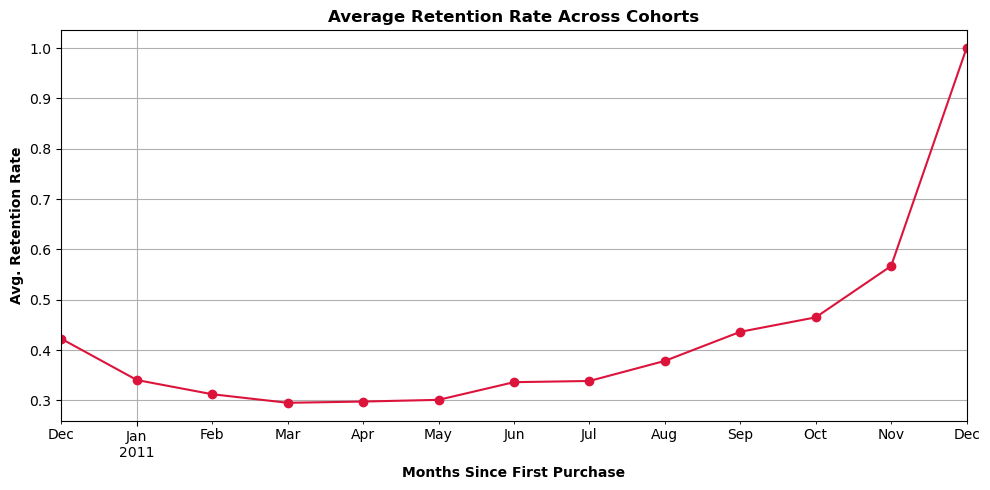

In [60]:
avg_retention = retention.mean(axis=1)  # Average retention per month since acquisition

plt.figure(figsize=(10, 5))
avg_retention.plot(marker='o', linestyle='-', color='crimson')

plt.title('Average Retention Rate Across Cohorts', fontweight='bold')
plt.xlabel('Months Since First Purchase', fontweight='bold')
plt.ylabel('Avg. Retention Rate', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# !pip install lifetimes


In [ ]:
# Train BG/NBD model using RFM features, validate with spend data

In [62]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']


In [63]:
from lifetimes.utils import summary_data_from_transaction_data

# Prepare transaction data
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Generate summary RFM-like features
summary = summary_data_from_transaction_data(
    data, 
    customer_id_col='CustomerID', 
    datetime_col='InvoiceDate', 
    monetary_value_col='TotalAmount',  # Make sure this column exists
    observation_period_end=data['InvoiceDate'].max()
)

summary.head()


,frequency,recency,T,monetary_value
CustomerID,,,,
12346,0.0,0.0,334.0,0.000000
12347,6.0,365.0,365.0,59683.226667
12348,3.0,274.0,365.0,12374.866667
12349,0.0,0.0,30.0,0.000000
12350,0.0,0.0,303.0,0.000000


In [64]:
from lifetimes import BetaGeoFitter

# Initialize the model
bgf = BetaGeoFitter(penalizer_coef=0.05)

# Fit the model
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

# View summary
bgf.summary



,coef,se(coef),lower 95% bound,upper 95% bound
r,8.725725e-01,2.323860e-02,8.270248e-01,9.181202e-01
alpha,9.851510e+01,3.195067e+00,9.225277e+01,1.047774e+02
a,1.589650e-19,2.296978e-13,-4.502075e-13,4.502078e-13
b,3.181020e-09,4.596398e-03,-9.008936e-03,9.008942e-03


In [65]:

# Try a larger penalizer
bgf = BetaGeoFitter(penalizer_coef=0.1)  # You can try 0.1 or even 0.5 if needed
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,7.213664e-01,1.744818e-02,6.871679e-01,7.555648e-01
alpha,8.118617e+01,2.542769e+00,7.620234e+01,8.616999e+01
a,1.785109e-18,8.103094e-13,-1.588205e-12,1.588208e-12
b,5.121135e-08,2.324316e-02,-4.555654e-02,4.555664e-02


In [66]:
# Predict purchases in next 30 days
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30, 
    summary['frequency'], 
    summary['recency'], 
    summary['T']
)


In [67]:
actual_spend_df = data.groupby('CustomerID').agg({
    'TotalAmount': 'sum'
}).reset_index()

actual_spend_df.columns = ['CustomerID', 'ActualSpend']


In [68]:
summary['predicted_spend'] = ggf.conditional_expected_average_profit(
    summary['frequency'], summary['monetary_value']
)

# Merge with actual
comparison_df = pd.merge(
    summary.reset_index()[['CustomerID', 'predicted_spend']],
    actual_spend_df,
    on='CustomerID'
)


NameError: name 'ggf' is not defined

In [69]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter()
ggf.fit(summary['frequency'], summary['monetary_value'])


ValueError: There exist non-positive (<= 0) values in the monetary_value vector.

In [ ]:
# Filter the summary to only include rows with monetary_value > 0
summary_filtered = summary[summary['monetary_value'] > 0]

# Fit the model using the filtered data
ggf.fit(summary_filtered['frequency'], summary_filtered['monetary_value'])

# Predict expected average profit
summary_filtered['predicted_spend'] = ggf.conditional_expected_average_profit(
    summary_filtered['frequency'], summary_filtered['monetary_value']
)

# this one is correct


In [ ]:
# Merge predicted and actual
validation = summary.merge(actual_spend_df, on='CustomerID')

# Correlation check
validation[['predicted_purchases', 'actual_purchases']].corr()


In [ ]:
# Total transactions per customer (actual purchases)
actual_purchases_df = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique'  # or 'count' if InvoiceNo repeats for each product
}).reset_index()

actual_purchases_df.columns = ['CustomerID', 'actual_purchases']


In [ ]:
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30,  # days
    summary['frequency'],
    summary['recency'],
    summary['T']
)


In [ ]:
comparison_df = summary.reset_index()[['CustomerID', 'predicted_purchases']].merge(
    actual_purchases_df,
    on='CustomerID',
    how='inner'
)



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(comparison_df['actual_purchases'], comparison_df['predicted_purchases'], alpha=0.6)
plt.xlabel('Actual Purchases')
plt.ylabel('Predicted Purchases')
plt.title('Predicted vs. Actual Purchases')
plt.grid(True)
plt.show()


In [ ]:
# Assuming you already have RFM in a DataFrame called rfm_data

# Example of additional features you might add
rfm_data['days_since_last_purchase'] = (pd.to_datetime('today') - rfm_data['last_purchase_date']).dt.days
rfm_data['total_transactions'] = rfm_data['frequency'] * rfm_data['monetary_value']  # e.g., total spend

# Make sure to clean or fill any missing values
rfm_data = rfm_data.dropna()  # Or use imputation methods

# Define your features and target variable
X = rfm_data[['recency', 'frequency', 'monetary', 'days_since_last_purchase', 'total_transactions']]  # Add more features as needed
y = rfm_data['spend']  # Replace with your target column (e.g., 'spend', 'churn', etc.)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_predictions = rf_model.predict(X_test)

# Evaluate using MAE and RMSE
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print(f"Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}")

# Option 2: Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_predictions = xgb_model.predict(X_test)

# Evaluate using MAE and RMSE
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}")


In [ ]:
, fontweight='bold'

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)
plt.title('Frequency vs. Recency Matrix')
plt.show()


In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)
plt.title('Customer Alive Probability Matrix')
plt.show()


In [ ]:
data.head()